In [1]:
import pandas as pd

## Pandas

A powerful Data Analysis library for python built on top of Numpy

Cheat Sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

### DataFrame
We can think of Pandas as dictionary of series. Let's see an example of how we construct a DataFrame using equal-length lists or arrays

In [2]:
dat = {'district': ['Makati', 'BGC', 'Ayala', 'Cebu', 'Davao'], 
      'year': [2001,2002,2003,2006,2007], 
      'population': [1.2, 2.3, 4.2, .8, 1.6]}

df = pd.DataFrame(dat)
df

,district,population,year
0,Makati,1.2,2001
1,BGC,2.3,2002
2,Ayala,4.2,2003
3,Cebu,0.8,2006
4,Davao,1.6,2007


In [3]:
# we want to know the column names
print(df.columns)
# we want to know the index names
print(df.index)

Index(['district', 'population', 'year'], dtype='object')
RangeIndex(start=0, stop=5, step=1)


There are two ways of accessing an entire column:
* df[ 'pop' ]
* df.pop

In [4]:
df.population
#df['population']

0    1.2
1    2.3
2    4.2
3    0.8
4    1.6
Name: population, dtype: float64

In [5]:
#create another column:
car = pd.Series([1.3, 2.3, 4.5]) #from Series
df['cars'] = car
df

,district,population,year,cars
0,Makati,1.2,2001,1.3
1,BGC,2.3,2002,2.3
2,Ayala,4.2,2003,4.5
3,Cebu,0.8,2006,NaN
4,Davao,1.6,2007,NaN


### How to index / subset DataFrame?
* iloc
* loc
* ix
* masking

### df.iloc 
Implicit location

df.iloc[row,column]

In [6]:
df.iloc[[2],[3]] #index 2(row), index 3(column)

,cars
2,4.5


In [7]:
df.iloc[:2,:] #First two records

,district,population,year,cars
0,Makati,1.2,2001,1.3
1,BGC,2.3,2002,2.3


In [8]:
df.iloc[:,:2] #First 2 columns

,district,population
0,Makati,1.2
1,BGC,2.3
2,Ayala,4.2
3,Cebu,0.8
4,Davao,1.6


In [9]:
df.iloc[-1:,:] # last record 

,district,population,year,cars
4,Davao,1.6,2007,NaN


In [10]:
df.iloc[:,-1:] #last column

,cars
0,1.3
1,2.3
2,4.5
3,NaN
4,NaN


**Exercise: Extract Year and Cars for Ayala and Davao**

### df.loc 
Explicit location

df.loc[row_index,column_index]

In [11]:
df

,district,population,year,cars
0,Makati,1.2,2001,1.3
1,BGC,2.3,2002,2.3
2,Ayala,4.2,2003,4.5
3,Cebu,0.8,2006,NaN
4,Davao,1.6,2007,NaN


In [12]:
df.loc[1,'population'] #When using loc, we define the location explicitly using indices

2.2999999999999998

In [13]:
df.loc[1,2] #This will generate an error! But why?

TypeError: cannot do label indexing on <class 'pandas.indexes.base.Index'> with these indexers [2] of <class 'int'>

In [14]:
#We can also replace the index if you want
df.index = ['a','b','c','d','e']
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


### df.ix 
Explicit-Implicit location

df.ix[row,column]

In [15]:
df.iloc['c','cars'] #This will generate an error since the indexers are explicit

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [16]:
#Above problem can be solved by using ix instead of iloc
df.ix[['c'],['cars']]

,cars
c,4.5


In [17]:
df.ix[[2],['cars']]

,cars
c,4.5


In [18]:
df.ix[['d'],[2]]

,year
d,2006


### Masking
slicing data using a mask generated by boolean logic

In [19]:
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


In [20]:
#Masking based on a condition
df[df['population'] > 2]

,district,population,year,cars
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5


In [21]:
#This is the mask which is later on passed to the df['mask']
df['population'] > 2

a    False
b     True
c     True
d    False
e    False
Name: population, dtype: bool

In [22]:
#Masking based on multiple conditions
#year greater or equal to 2003 and population less than 2M
df[(df['year'] >= 2003) & (df['population'] < 2)]

,district,population,year,cars
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


take note of the boolean operators '&' for intersection '|' for union

In [23]:
df['district'] #call one column

a    Makati
b       BGC
c     Ayala
d      Cebu
e     Davao
Name: district, dtype: object

In [24]:
# call multiple columns
# subset with a list[]
df[['population', 'cars']]



,population,cars
a,1.2,1.3
b,2.3,2.3
c,4.2,4.5
d,0.8,NaN
e,1.6,NaN


### Sorting
*  df.sort_values(by='col_name', ascending = True)

In [25]:
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


In [26]:
df.sort_values(by = 'district')


,district,population,year,cars
c,Ayala,4.2,2003,4.5
b,BGC,2.3,2002,2.3
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN
a,Makati,1.2,2001,1.3


In [27]:
df.sort_values(by = 'population', ascending = False)

,district,population,year,cars
c,Ayala,4.2,2003,4.5
b,BGC,2.3,2002,2.3
e,Davao,1.6,2007,NaN
a,Makati,1.2,2001,1.3
d,Cebu,0.8,2006,NaN


### Summarizing and Computing Descriptive stats

In [28]:
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


In [29]:
df.describe()

,population,year,cars
count,5.000000,5.000000,3.000000
mean,2.020000,2003.800000,2.700000
std,1.338656,2.588436,1.637071
min,0.800000,2001.000000,1.300000
25%,1.200000,2002.000000,1.800000
50%,1.600000,2003.000000,2.300000
75%,2.300000,2006.000000,3.400000
max,4.200000,2007.000000,4.500000


In [30]:
df.sum(axis = 1)

a    2003.5
b    2006.6
c    2011.7
d    2006.8
e    2008.6
dtype: float64

In [31]:
#let's try to calculate mean of cars column
print('mean of num of cars is:',df.cars.mean())

mean of num of cars is: 2.6999999999999997


In [32]:
#Let's try to calculate standard deviation of population
print('std dev of population is:',df.population.std())

std dev of population is: 1.3386560424545209


### Handling Missing Values
* dropna
* fillna
* isnull
* notnull

In [33]:
import numpy as np

s = pd.Series(['a', np.nan, 1, 2.3])

In [34]:
#Determine if an element is Nan

s.isnull().values.any()

True

In [35]:
#detect which part of the series is null
s.isnull()

0    False
1     True
2    False
3    False
dtype: bool

In [36]:
#We cn drop NA
s.dropna()


0      a
2      1
3    2.3
dtype: object

In [37]:
#back to our df
df

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,NaN
e,Davao,1.6,2007,NaN


What if we want to impute for Nan Values?

In [38]:
#or we can impute them
df2 = df.fillna(df.cars.mean())
df2

,district,population,year,cars
a,Makati,1.2,2001,1.3
b,BGC,2.3,2002,2.3
c,Ayala,4.2,2003,4.5
d,Cebu,0.8,2006,2.7
e,Davao,1.6,2007,2.7


### Loading Data
* read_csv
* read_txt
* read_table

### Outputting Data

In [155]:
#Say we want to save df2 as csv file in or local drive:

df2.to_csv("C:/Users/ASUS/Documents/Python_Scripts/df2.csv")

## Merging Datasets
* pandas.merge - merge using SQL Like commands
* pandas.concat - stack Dfs along a certain axis

In [39]:
# a displayer function borrowed from Jake VanDerPlas
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [40]:
df1 = pd.DataFrame({'Policy_Holder': ['001', '023', '054', '120', '032'],
                    'Policy_Typ': ['Home & Contents', 'Property', 'Motor', 'Motor', 'Workers_comp']})
df2 = pd.DataFrame({'Pol_H': ['001', '023', '054', '120', '032'],
                    'Inc_date': [2004, 2008, 2012, 2014, 2012]})
display('df1', 'df2')

,Policy_Holder,Policy_Typ
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp
,Inc_date,Pol_H
0,2004,001
1,2008,023
2,2012,054
3,2014,120


### Merge

Say we want to get the inception date in df2 table by joining these datasets

In [41]:
df_join = pd.merge(df1, df2, left_on = 'Policy_Holder', right_on = 'Pol_H', how = 'left')

#if you don't specify, it will automatically find common key and join on that key
#in our example, we specify the left and right keys

display('df1', 'df2', 'df_join')



,Policy_Holder,Policy_Typ
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp
,Inc_date,Pol_H
0,2004,001
1,2008,023
2,2012,054
3,2014,120


In [42]:
#Insert other merge functionalities eg. Suffix, etc

### Excercise

1. Download Data from:

https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv

https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv

https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

2. Task: Rank US States and territories by their 2010 population

### Concatenating

Most of the time we need to append datasets. we can specify the axis of concatenation:

* axis = 1 means along columns
* axis = 0 means along rows

Let's see how this is done in numpy arrays first

In [43]:
import numpy as np
my_array = np.arange(20).reshape(4,5)
my_array


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [44]:
np.concatenate([my_array, my_array], axis = 0) #try axis = 1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### pd.concat( [ list_of_items ] )

fells like rbind or cbind in R

In [45]:
pd.concat([df1,df1], axis = 0,) #try ignore_index = True

,Policy_Holder,Policy_Typ
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp
0,001,Home & Contents
1,023,Property
2,054,Motor
3,120,Motor
4,032,Workers_comp


### Let's try Getting Data and Computing Correlationbetween two stocks

Get data first from Google Finance Stock prices and volumes

In [46]:
import pandas_datareader.data as web


apple = web.DataReader("AAPL", 'google', '1/1/2006', '1/1/2016')
microsoft = web.DataReader("MSFT", 'google', '1/1/2006', '1/1/2016')

In [47]:
print(apple.head())
print(microsoft.head())

             Open   High    Low  Close     Volume
Date                                             
2006-01-03  10.34  10.68  10.32  10.68  201853036
2006-01-04  10.73  10.85  10.64  10.71  155225609
2006-01-05  10.69  10.70  10.54  10.63  112396081
2006-01-06  10.75  10.96  10.65  10.90  176139334
2006-01-09  10.96  11.03  10.82  10.86  168861224
             Open   High    Low  Close     Volume
Date                                             
2006-01-03  26.25  27.00  26.10  26.84   79974418
2006-01-04  26.77  27.08  26.77  26.97   57975661
2006-01-05  26.96  27.13  26.91  26.99   48247610
2006-01-06  26.89  27.00  26.49  26.91  100969092
2006-01-09  26.93  27.07  26.76  26.86   55627836


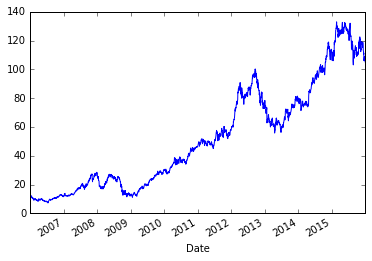

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
apple.Close.plot()

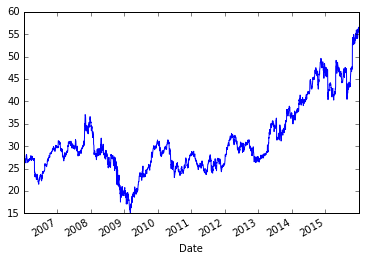

In [49]:
microsoft.Close.plot()

In [50]:
dat = pd.concat({'apple_close' : apple['Close'],'msft_close' : microsoft['Close']}, axis = 1)
dat.head()

,apple_close,msft_close
Date,,
2006-01-03,10.68,26.84
2006-01-04,10.71,26.97
2006-01-05,10.63,26.99
2006-01-06,10.90,26.91
2006-01-09,10.86,26.86


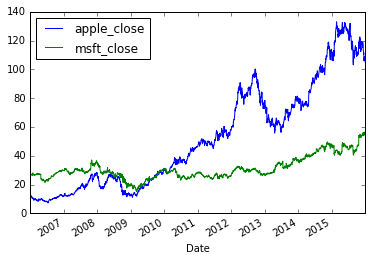

In [51]:
dat.plot()

### Correlation between two dataframe columns

In [52]:
dat['apple_close'].corr(dat['msft_close'])

0.79949501653802868

### Group By: The Split - Apply - Combine principle

the magic of groupby!!

aggregate(), filter(), transform(), apply() check my implementation in dup pay

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

* **Split** - break up and group a dataframe based on a specified key
* **apply** - evaluate some function per split
* **combine** - Merge back the splitted data with the applied function

In [59]:
#Lets see some example:
df = pd.DataFrame({'div': ['AO', 'GO', 'EM', 'AO', 'GO', 'EM'],
                   'data': range(1,7)}, columns=['div', 'data'])
df

,div,data
0,AO,1
1,GO,2
2,EM,3
3,AO,4
4,GO,5
5,EM,6


In [60]:
#groupby object
df.groupby('div')

#doesn't calculate yet until aggregation

In [64]:
AO = df[df['div']=='AO'].copy()
GO = df[df['div']=='GO'].copy()
EM = df[df['div']=='EM'].copy()
display('AO', 'GO', 'EM')

,div,data
0,AO,1
3,AO,4
,div,data
1,GO,2
4,GO,5
,div,data
2,EM,3
5,EM,6


data is split first accordingly

In [63]:
df.groupby('div').sum()

,data
div,
AO,5
EM,9
GO,7


after splitting, the function is applied and then the results are combined

Some Aggregate functions:

    count(), first(), last(), mean(), median(), min(), max(), std(), var(), prod(), sum()

### Now we apply groupby

Credit data set from Introduction to Statistical Learning

http://www-bcf.usc.edu/~gareth/ISL/data.html

* balance(average credit card debt for a number of individuals)
* age
* cards (number of credit cards)
* education(years of education)
* income (in thousands of dollars)
* limit (credit limit),
* rating (credit rating)

In [53]:
credit = pd.read_csv('C:/Users/ASUS/Documents/Python_Scripts/credit/ISLR_Credit.csv')

In [54]:
credit.tail()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


In [55]:
credit.rename(columns = {list(credit)[0]:'ID'}, inplace = True)

In [12]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
ID           400 non-null int64
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [57]:
#the groupby object
credit.groupby('Ethnicity')['Balance']

In [64]:
credit.groupby(['Ethnicity'])[['Balance']].sum()

,Balance
Ethnicity,
African American,52569
Asian,52256
Caucasian,103181


In [68]:
credit.groupby(['Gender'])[['Balance']].describe().unstack()

#What can we infer from these statistics?

Balance                                                         
         count        mean         std  min   25%    50%    75%     max
Gender                                                                 
 Male    193.0  509.803109  462.119644  0.0   5.0  463.0  815.0  1999.0
Female   207.0  529.536232  458.461672  0.0  92.0  456.0  887.0  1809.0

In [71]:
credit.groupby(['Gender', 'Ethnicity'])['Balance'].sum().unstack()


Ethnicity,African American,Asian,Caucasian
Gender,,,
Male,27119,21285,49988
Female,25450,30971,53193


We can use multi index or Multi column to summarise

In [18]:
credit.groupby(['Gender'])['Limit','Balance' ].describe().unstack()

Limit                                                           \
        count         mean          std    min     25%     50%     75%   
Gender                                                                   
 Male   193.0  4713.165803  2360.210635  855.0  2998.0  4534.0  5884.0   
Female  207.0  4756.516908  2264.160606  855.0  3194.0  4768.0  5852.0   

                Balance                                                   \
            max   count        mean         std  min   25%    50%    75%   
Gender                                                                     
 Male   13913.0   193.0  509.803109  462.119644  0.0   5.0  463.0  815.0   
Female  13414.0   207.0  529.536232  458.461672  0.0  92.0  456.0  887.0   

                
           max  
Gender          
 Male   1999.0  
Female  1809.0

**df.groupby( 'column_to_group_by' )[ 'column_to_perform_function' ].function()**

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

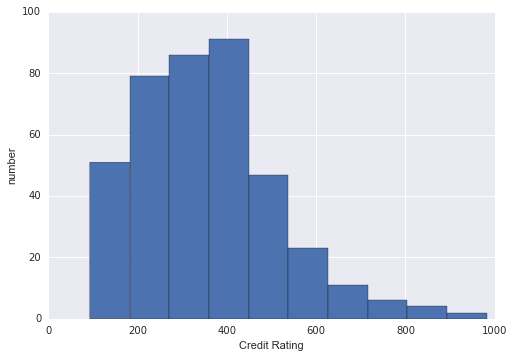

In [74]:
plt.hist(credit['Rating'])
plt.ylabel('number')
plt.xlabel('Credit Rating')

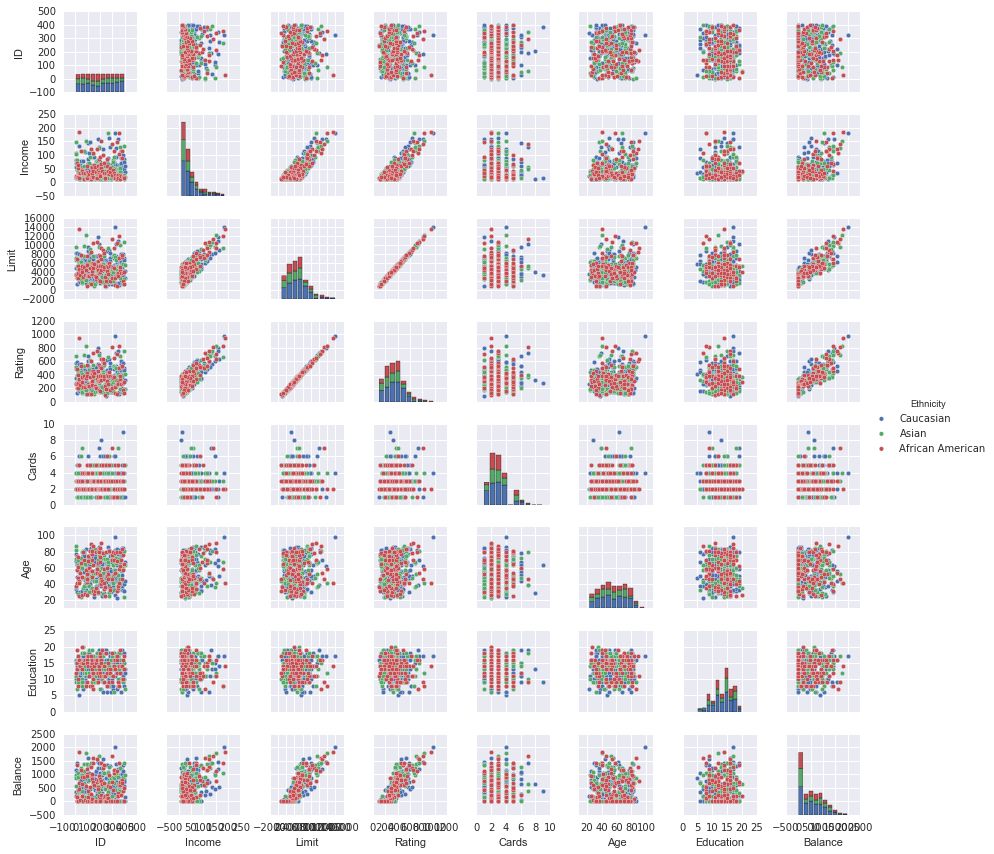

In [78]:
sns.pairplot(credit, hue = 'Ethnicity', size = 1.5)

### Pivot Tables
let's try some pivot tables instead of groupby 

In [86]:
credit.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [110]:
pd.pivot_table(credit, index = ['Ethnicity','Student'], values =['Limit','Rating'], aggfunc = 'mean')

Limit      Rating
Ethnicity        Student                         
African American No       4833.606742  361.505618
                 Yes      5308.700000  396.800000
Asian            No       4540.202247  340.348315
                 Yes      5070.769231  380.230769
Caucasian        No       4792.368132  359.071429
                 Yes      4044.294118  308.764706

In [102]:
pd.pivot_table?

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [108]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [112]:
help(sns.load_dataset)

Help on function load_dataset in module seaborn.utils:

load_dataset(name, cache=True, data_home=None, **kws)
    Load a dataset from the online repository (requires internet).
    
    Parameters
    ----------
    name : str
        Name of the dataset (`name`.csv on
        https://github.com/mwaskom/seaborn-data).  You can obtain list of
        available datasets using :func:`get_dataset_names`
    cache : boolean, optional
        If True, then cache data locally and use the cache on subsequent calls
    data_home : string, optional
        The directory in which to cache data. By default, uses ~/seaborn_data/
    kws : dict, optional
        Passed to pandas.read_csv



In [113]:
car_crash = 

C:\Anaconda3\lib\site-packages\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'exercise',
 'flights',
 'gammas',
 'iris',
 'planets',
 'tips',
 'titanic']

Excercises:

* https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles.ipynb
* https://github.com/guipsamora/pandas_exercises
* http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb
* http://twiecki.github.io/blog/2014/11/18/python-for-data-science/
        

### A little bit of Scikit

* http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb
* Introduction to Statistical Learning in R

In [24]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

**Features Matrix**
- a table that contains the variables, may come from a numpy array, a dataframe

**Target Array**
- the quantity we usually want to predict

**API Basics**

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
> For supervised learning, often we predict labels for unknown data using the predict() method.
> For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [71]:
credit = pd.read_csv('C:/Users/ASUS/Documents/Python_Scripts/credit/ISLR_Credit.csv') 

In [72]:
credit.head() #Let's try to apply basic logistic regression to predict Rating

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [73]:
credit.rename(columns = {list(credit)[0]:'ID'}, inplace = True) #rename column

** 1.  Choose a class of Model**

In [101]:
from sklearn.linear_model import LinearRegression

In [75]:
LogisticRegression?

** 2. Choose Model HyperParameters**

in this example we will just select fit_intercept = True, to indicate we want to add the intercept in the logit function. Note that at this point we are not yet modelling, rather we are defining the class of the model

In [103]:
model = LinearRegression(fit_intercept = True, normalize = True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

**3. Set up features matirx and Target Array **


In [104]:
#credit = credit.drop('ID', axis = 1)
credit.head(3)


,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [105]:
# SOme Variables are not numeric, and so we might need to create dummy variables for them:
credit_d1 = pd.get_dummies(credit)
credit_d1.head(3)

,ID,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,106.025,6645,483,3,82,15,903,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,104.593,7075,514,4,71,11,580,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [106]:
y_credit = credit_d1['Rating'] #target array
X_credit = credit_d1.drop(['ID', 'Rating'], axis = 1) #Feature Matrix

In [107]:
X_credit.head(3)

,Income,Limit,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,2,34,11,333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,106.025,6645,3,82,15,903,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,104.593,7075,4,71,11,580,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Split the data into train and test

In [108]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_credit , y_credit , random_state = 1)


In [53]:
train_test_split?

**4. FIt the model** 

In [109]:
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

**5. Apply the model and evaluate**

In [110]:
Y_pred = model.predict(Xtest)

In [112]:
Y_pred

array([ 199.41025725,  196.9756482 ,  281.45387887,  718.34016295,
        352.22221595,  246.2816563 ,  296.05731718,  286.89954378,
        416.26183498,  172.66770013,  755.36266965,  285.34731088,
        548.11442252,  224.43058591,  237.39920875,  413.11267832,
        187.9893667 ,  582.87220107,  484.44487719,  354.67662334,
        499.88764033,  117.82012663,  399.16918873,  386.59698084,
        328.84221694,  228.73127241,  567.06502156,  545.07231175,
        361.65408163,  345.63363809,  309.66023249,  359.79898108,
        346.02269166,  623.77467847,  257.31101452,  267.45489816,
        264.19072225,  543.48672829,  325.74514289,  738.50629895,
        137.09255371,  387.17547502,  313.63132737,  149.56506933,
        412.92720232,  855.57454769,  506.66559781,  296.99643177,
        655.73285797,  500.68896962,  320.14231557,  422.29460711,
        546.15014677,  456.64256299,  370.29089323,  137.42019343,
        278.48326835,  639.88836688,  206.3585935 ,  436.39724

In [114]:
params = pd.Series(model.coef_, index=Xtrain.columns)
params

Income                        0.170782
Limit                         0.061866
Cards                         4.516418
Age                           0.021597
Education                    -0.249599
Balance                       0.018900
Gender_ Male                  0.178602
Gender_Female                -0.178602
Student_No                    2.957951
Student_Yes                  -2.957951
Married_No                   -1.088847
Married_Yes                   1.088847
Ethnicity_African American    1.215586
Ethnicity_Asian              -0.902734
Ethnicity_Caucasian          -0.235547
dtype: float64

In [117]:
residue = pd.Series(model.residue_, index=Xtrain.columns)
residue

AttributeError: 'LinearRegression' object has no attribute 'residue_'